Nama : Nadilla Nur 'Aini Yulian Putri

Kode Peserta : PYTN-KS15-012

Kelas : Introduction to Python for Data Science (Studi Independent)

## Import Library

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Load and Review Data

Dengan menggunakan data Marketing Campaign dari Portugese Banking Institution, kita akan membuat model yang dapat memprediksi apakah client akan menerima atau menolak tawaran deposito yang diberikan. Pertama, mari impor data terlebih dahulu.

In [60]:
df_bank = pd.read_csv('dataset/bank-additional-full.csv', delimiter=';')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [61]:
df_bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [62]:
df_bank.shape

(41188, 21)

In [63]:
# Untuk melihat info dataframe
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Cleanup

In [64]:
# Menghapus kolom yang tidak dipakai
clean_df = df_bank.drop(['campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)
clean_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'y'],
      dtype='object')

In [65]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  y            41188 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.8+ MB


In [66]:
# cek apakah ada data yang null atau tidak
clean_df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
y              0
dtype: int64

In [67]:
clean_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,no


## Encoding

mengubah string menjadi angka

In [68]:
le = preprocessing.LabelEncoder()

In [69]:
# clean_df.job = le.fit_transform(clean_df.job)
# clean_df.marital = le.fit_transform(clean_df.marital)
# clean_df.education = le.fit_transform(clean_df.education)
# clean_df.default = le.fit_transform(clean_df.default)
# clean_df.housing = le.fit_transform(clean_df.housing)
# clean_df.loan = le.fit_transform(clean_df.loan)
# clean_df.contact = le.fit_transform(clean_df.contact)
# clean_df.month = le.fit_transform(clean_df.month)
# clean_df.day_of_week = le.fit_transform(clean_df.day_of_week)
# clean_df.y = le.fit_transform(clean_df.y)

In [70]:
clean_df.job.replace({'unknown': 0, 'admin.': 1,'blue-collar': 2,'entrepreneur': 3,'housemaid': 4,'management': 5,'retired': 6,'self-employed': 7,'services': 8,'student': 9,'technician': 10,'unemployed': 11}, inplace=True)
clean_df.marital.replace({'unknown': 0, 'divorced': 1,'married': 2,'single': 3}, inplace=True)
clean_df.education.replace({'unknown': 0, 'basic.4y': 1,'basic.6y': 2,'basic.9y': 3,'high.school': 4,'illiterate': 5,'professional.course': 6,'university.degree': 7}, inplace=True)
clean_df.default.replace({'unknown': 0, 'no': 0, 'yes': 1}, inplace=True)
clean_df.housing.replace({'unknown': 0, 'no': 0, 'yes': 1}, inplace=True)
clean_df.loan.replace({'unknown': 0, 'no': 0, 'yes': 1}, inplace=True)
clean_df.contact.replace({'cellular': 1,'telephone': 2}, inplace=True)
clean_df.month.replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}, inplace=True)
clean_df.day_of_week.replace({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}, inplace=True)
clean_df.y.replace({'no': 0, 'yes': 1}, inplace=True)

In [71]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          41188 non-null  int64
 1   job          41188 non-null  int64
 2   marital      41188 non-null  int64
 3   education    41188 non-null  int64
 4   default      41188 non-null  int64
 5   housing      41188 non-null  int64
 6   loan         41188 non-null  int64
 7   contact      41188 non-null  int64
 8   month        41188 non-null  int64
 9   day_of_week  41188 non-null  int64
 10  duration     41188 non-null  int64
 11  y            41188 non-null  int64
dtypes: int64(12)
memory usage: 3.8 MB


In [72]:
clean_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,y
0,56,4,2,1,0,0,0,2,5,1,261,0
1,57,8,2,4,0,0,0,2,5,1,149,0
2,37,8,2,4,0,1,0,2,5,1,226,0
3,40,1,2,2,0,0,0,2,5,1,151,0
4,56,8,2,4,0,0,1,2,5,1,307,0


## Training Model

In [73]:
x = np.array(clean_df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration']])

In [74]:
x

array([[ 56,   4,   2, ...,   5,   1, 261],
       [ 57,   8,   2, ...,   5,   1, 149],
       [ 37,   8,   2, ...,   5,   1, 226],
       ...,
       [ 56,   6,   2, ...,  11,   5, 189],
       [ 44,  10,   2, ...,  11,   5, 442],
       [ 74,   6,   2, ...,  11,   5, 239]], dtype=int64)

In [75]:
y = np.array(clean_df['y'])

In [76]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Mari menentukan feature (x) dan target (y)

In [77]:
x = clean_df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration']]
y = clean_df['y']

In [78]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
0,56,4,2,1,0,0,0,2,5,1,261
1,57,8,2,4,0,0,0,2,5,1,149
2,37,8,2,4,0,1,0,2,5,1,226
3,40,1,2,2,0,0,0,2,5,1,151
4,56,8,2,4,0,0,1,2,5,1,307


In [79]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## Split Data

Selanjutnya, split dataset menjadi training set dan test set.

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [81]:
print("Jumlah Original Berlangganan Deposit : ", len(y[y == 1]))
print("Jumlah Original Tidak Berlangganan Deposit : ", len(y[y == 0]))

print("Training True : ", len(y_train[y_train == 1]))
print("Training False : ", len(y_train[y_train == 0]))

print("Testing True : ", len(y_test[y_test == 1]))
print("Testing False : ", len(y_test[y_test == 0]))

Jumlah Original Berlangganan Deposit :  4640
Jumlah Original Tidak Berlangganan Deposit :  36548
Training True :  3715
Training False :  29235
Testing True :  925
Testing False :  7313


## Create a Model and Train It

### Logistic Regression

In [82]:
# create a Logistic Regression
lr_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)

# train the model using the training sets
lr_model.fit(x_train, y_train)

# predict the response for test dataset
lr_pred = lr_model.predict(x_test)

In [83]:
lr_model.score(x_train, y_train)

0.8933839150227617

In [84]:
lr_model.score(x_test, y_test)

0.896698227725176

In [85]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_pred)))
print(metrics.confusion_matrix(y_test, lr_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_pred))
print(metrics.recall_score(y_test, lr_pred))

Accuracy: 0.8967
[[7192  121]
 [ 730  195]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7313
           1       0.62      0.21      0.31       925

    accuracy                           0.90      8238
   macro avg       0.76      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238

0.21081081081081082


Mari visualisasikan confusion matrixnya

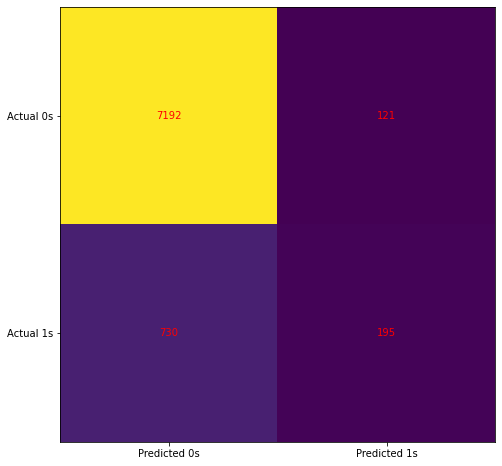

In [86]:
cm = metrics.confusion_matrix(y_test, lr_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

Diketahui bahwa shades of dark purple menunjukkan angka kecil (132, 161), sedangkan shades of yellow menunjukkan angka besar.

### K-Nearest Neighbor (KNN)

In [87]:
# create a K-Nearest Neighbor
knn_model = KNeighborsClassifier()

# train the model using the training sets
knn_model.fit(x_train, y_train)

# predict the response for test dataset
knn_pred = knn_model.predict(x_test)

In [88]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, knn_pred)))
print(metrics.confusion_matrix(y_test, knn_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, knn_pred))

Accuracy: 0.8880
[[7063  250]
 [ 673  252]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7313
           1       0.50      0.27      0.35       925

    accuracy                           0.89      8238
   macro avg       0.71      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238



### Support Vector Learning

In [89]:
# create a Support Vector Machine
svm_model = svm.SVC()

# train the model using the training sets
svm_model.fit(x_train, y_train)

# predict the response for test dataset
svm_pred = svm_model.predict(x_test)

In [90]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, svm_pred)))
print(metrics.confusion_matrix(y_test, svm_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, svm_pred))

Accuracy: 0.8965
[[7203  110]
 [ 743  182]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7313
           1       0.62      0.20      0.30       925

    accuracy                           0.90      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238



### Decision Tree

In [91]:
# create a Decision Tree
dt_model = DecisionTreeClassifier()

# train the model using the training sets
dt_model = dt_model.fit(x_train, y_train)

# predict the response for test dataset
dt_pred = dt_model.predict(x_test)

In [92]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, dt_pred)))
print(metrics.confusion_matrix(y_test, dt_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, dt_pred))
print(metrics.recall_score(y_test, dt_pred))

Accuracy: 0.8655
[[6735  578]
 [ 530  395]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7313
           1       0.41      0.43      0.42       925

    accuracy                           0.87      8238
   macro avg       0.67      0.67      0.67      8238
weighted avg       0.87      0.87      0.87      8238

0.42702702702702705


### Random Forest

In [93]:
# create a Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# train the model using the training sets
rf_model.fit(x_train, y_train.ravel())

# predict the response for test dataset
rf_pred = rf_model.predict(x_test)

In [94]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_pred)))
print(metrics.confusion_matrix(y_test, rf_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_pred))
print(metrics.recall_score(y_test, rf_pred))

Accuracy: 0.8984
[[7087  226]
 [ 611  314]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7313
           1       0.58      0.34      0.43       925

    accuracy                           0.90      8238
   macro avg       0.75      0.65      0.69      8238
weighted avg       0.88      0.90      0.89      8238

0.33945945945945943


In [95]:
clean_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'y'],
      dtype='object')

In [96]:
index = clean_df.drop(['y'], axis=1)

In [97]:
feature_imp = pd.Series(rf_model.feature_importances_, index=index.columns).sort_values(ascending=False)
feature_imp

duration       3.957563e-01
age            1.818201e-01
month          1.350686e-01
day_of_week    6.862955e-02
job            6.753545e-02
education      5.763727e-02
marital        2.882829e-02
housing        2.581655e-02
contact        2.190342e-02
loan           1.700438e-02
default        9.556245e-08
dtype: float64

### Naive Bayes

In [98]:
# create a Naive Bayes
gnb = GaussianNB()

# train the model using the training sets
gnb.fit(x_train, y_train)

# predict the response for test dataset
gnb_pred = gnb.predict(x_test)

In [99]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, gnb_pred)))
print(metrics.confusion_matrix(y_test, gnb_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, gnb_pred))
print(metrics.recall_score(y_test, gnb_pred))

Accuracy: 0.8932
[[7004  309]
 [ 571  354]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7313
           1       0.53      0.38      0.45       925

    accuracy                           0.89      8238
   macro avg       0.73      0.67      0.69      8238
weighted avg       0.88      0.89      0.89      8238

0.3827027027027027


### Accuracy Score

In [100]:
print("Logistic Regression: ", metrics.accuracy_score(y_test, lr_pred))
print("K-Nearest Neighbors: ", metrics.accuracy_score(y_test, knn_pred))
print("Support Vector Machine: ", metrics.accuracy_score(y_test, svm_pred))
print("Decision Tree: ", metrics.accuracy_score(y_test, dt_pred))
print("Random Forest: ", metrics.accuracy_score(y_test, rf_pred))
print("Naive Bayes: ", metrics.accuracy_score(y_test, gnb_pred))

Logistic Regression:  0.896698227725176
K-Nearest Neighbors:  0.8879582422918184
Support Vector Machine:  0.8964554503520272
Decision Tree:  0.8655013352755523
Random Forest:  0.8983976693372178
Naive Bayes:  0.8931779558145181


## Peningkatan Performa

In [101]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_pred)))
print(metrics.confusion_matrix(y_test, lr_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_pred))
print(metrics.recall_score(y_test, lr_pred))

Accuracy: 0.8967
[[7192  121]
 [ 730  195]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7313
           1       0.62      0.21      0.31       925

    accuracy                           0.90      8238
   macro avg       0.76      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238

0.21081081081081082


Bisa kita lihat bahwa nilai recall sangat kecil. Hal ini disebabkan karena jumlah klien berlangganan deposit dan tidak berlangganan deposit tidak seimbang.

In [102]:
print("Jumlah Original Berlangganan Deposit : ", len(y[y == 1]))
print("Jumlah Original Tidak Berlangganan Deposit : ", len(y[y == 0]))

Jumlah Original Berlangganan Deposit :  4640
Jumlah Original Tidak Berlangganan Deposit :  36548


Sekarang kita akan coba untuk menyeimbangkannya.

1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at C=0.100
1st max value of 0.738 occured at 

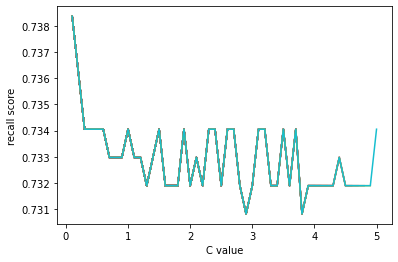

In [103]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

    best_score_C_val = C_values[recall_scores.index(best_recall_score)]
    print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val))

    plt.plot(C_values, recall_scores, "-")
    plt.xlabel("C value")
    plt.ylabel("recall score")

In [104]:
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7947
[[5864 1449]
 [ 242  683]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      7313
           1       0.32      0.74      0.45       925

    accuracy                           0.79      8238
   macro avg       0.64      0.77      0.66      8238
weighted avg       0.89      0.79      0.83      8238

0.7383783783783784


Sekarang bisa kita lihat nilai recall untuk yang berlangganan dan tidak berlangganan sudah sama sama diatas 0.7. Hal ini berarti data sudah balance dan model sudah sesuai untuk digunakan.